=== Departments ===
                          department_id department_name
0  9134852e-5e1c-456e-8775-ef2cfc71418a           Sales
1  a57b4ecd-aa90-4ed5-be9e-a1307e47bbff       Marketing
2  d094c790-a01e-49a9-9d57-2668360f17e8              IT
3  471ec0f9-78d6-4ef9-97af-b55c21d23416         Finance
4  bf96aed0-a978-4450-840e-f31527404327              HR 

=== Employees ===
                            employee_id          full_name  \
0  b1f8b714-b2d0-4930-ba57-a30e63a8cd50  Yolanda Clark PhD   
1  9e90c68d-9f47-46c5-9233-ad5cdea40519      Joseph Brooks   
2  1e5ac031-cf45-4231-80a5-e0526cfd9da4    Lorraine Hester   
3  7f952821-d6e0-47cd-b2c6-6903c55c20cf     William Benson   
4  b70c831d-d42f-4b1e-afbd-b686544604e8     Jordan Mercado   

                          department_id   hire_date  
0  9134852e-5e1c-456e-8775-ef2cfc71418a  2024-09-07  
1  471ec0f9-78d6-4ef9-97af-b55c21d23416  2024-12-04  
2  a57b4ecd-aa90-4ed5-be9e-a1307e47bbff  2021-02-08  
3  9134852e-5e1c-456e-8775-ef2cfc71

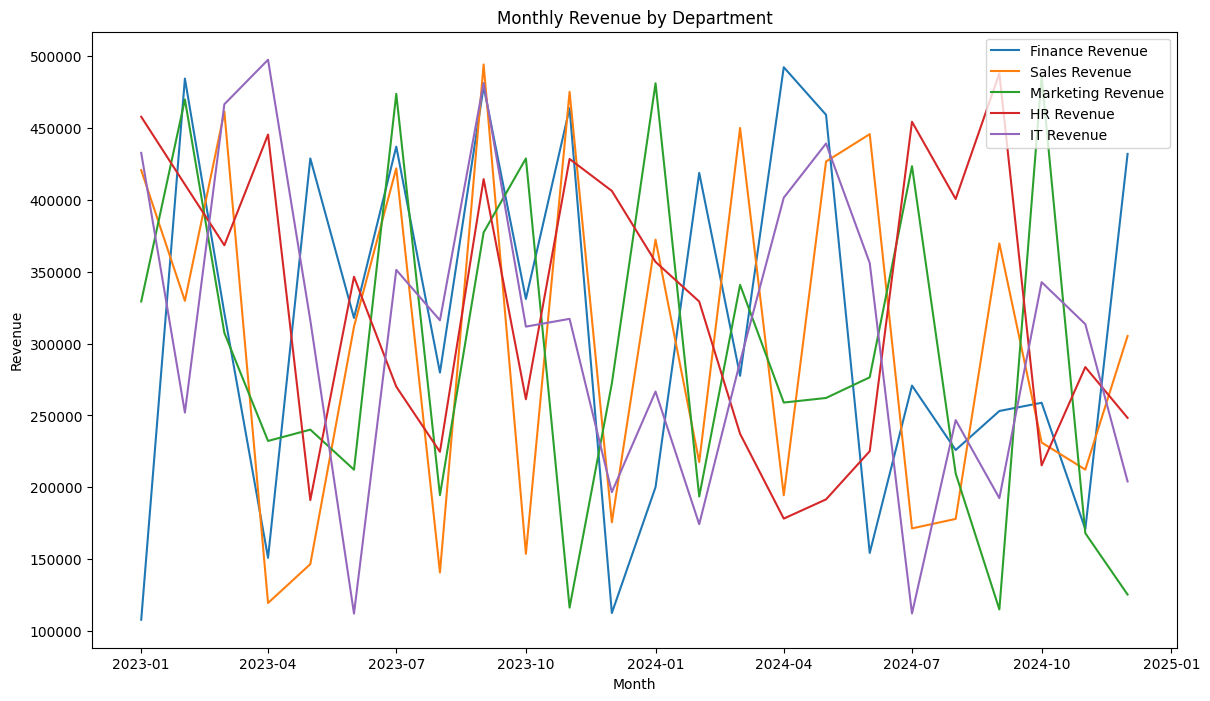

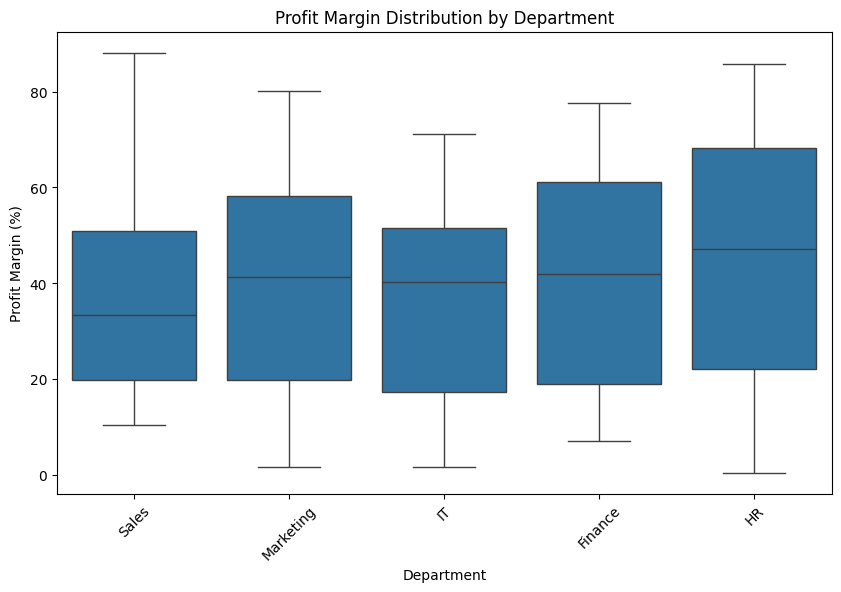

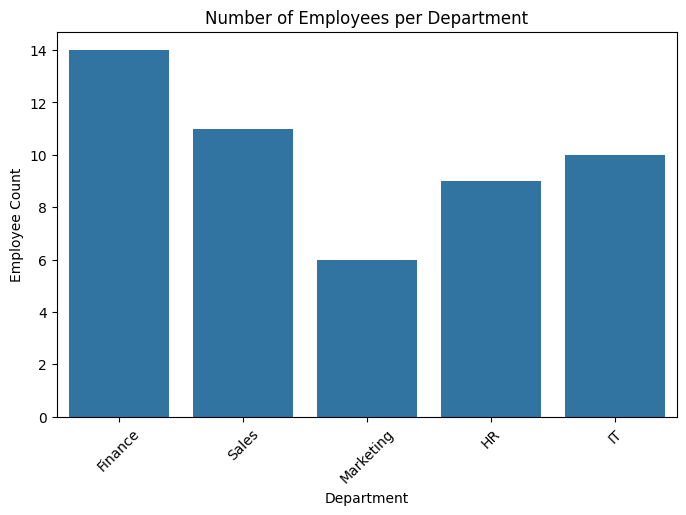

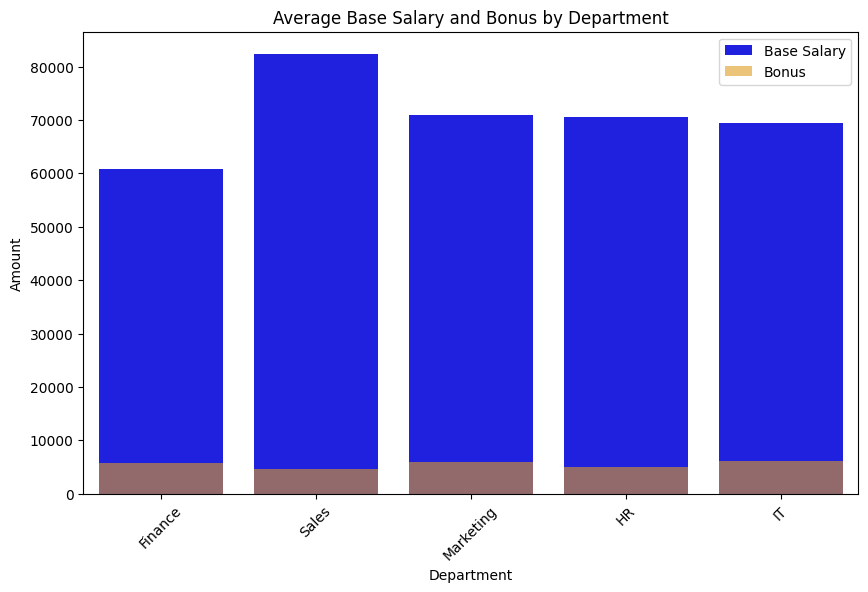

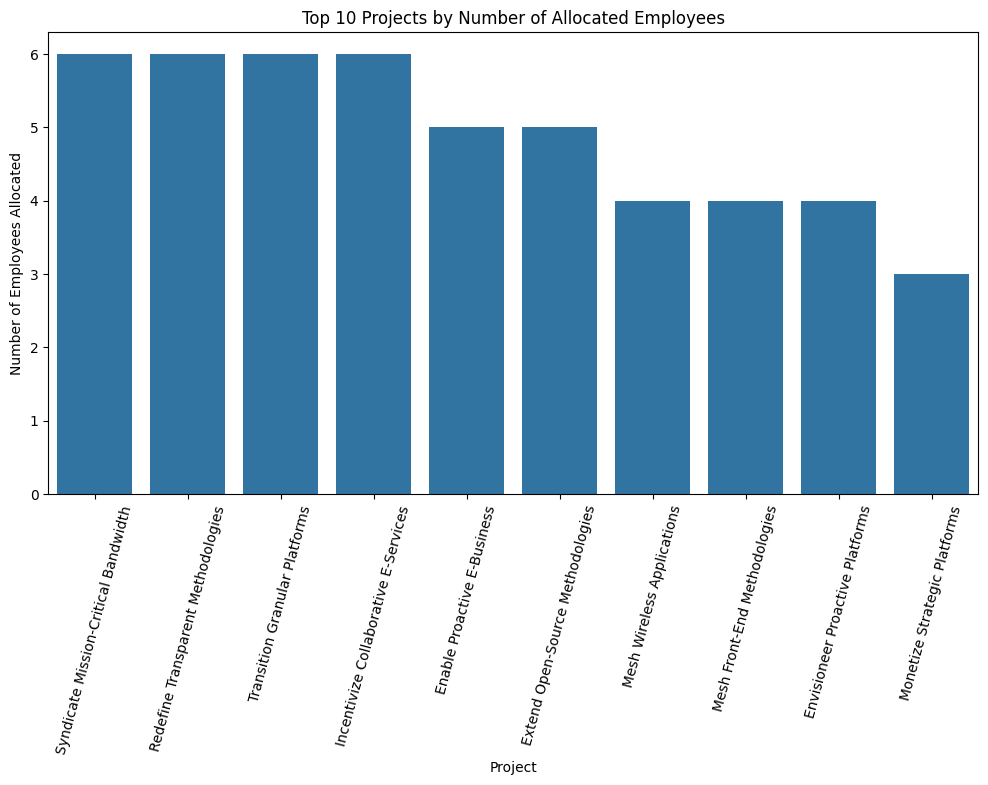

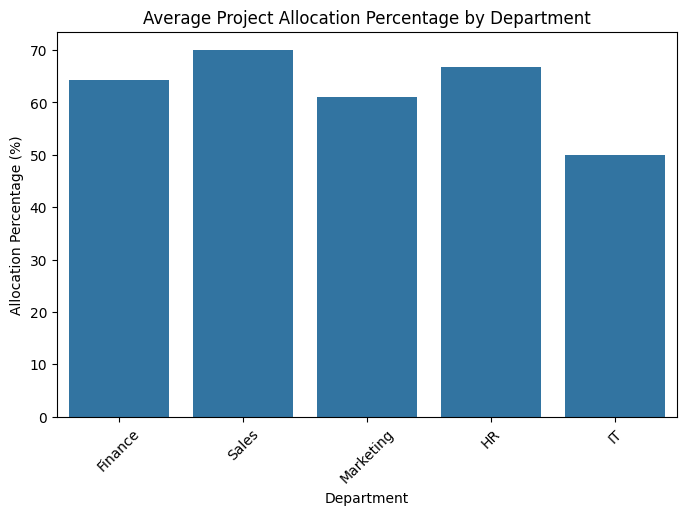

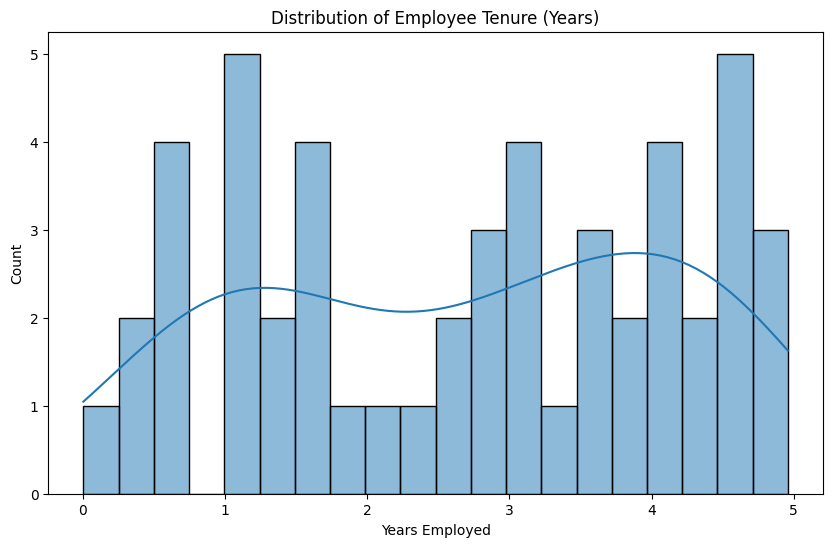

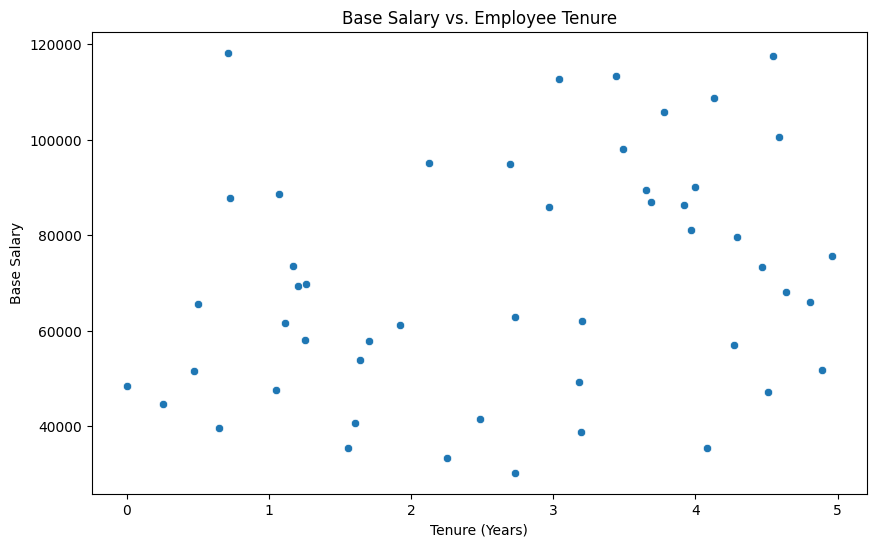

Top 5 Highest Paid Employees:
            full_name department_name  base_salary    bonus  \
0   Yolanda Clark PhD           Sales    118232.32  6153.93   
12     Cheyenne Walls              IT    117474.55  5867.64   
31   Phillip Gonzalez           Sales    113401.46  5277.52   
7     Timothy Johnson              IT    112677.79  4825.41   
34     Christy Miller       Marketing    108703.55  6302.00   

    total_compensation  
0            124386.25  
12           123342.19  
31           118678.98  
7            117503.20  
34           115005.55  


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
db_path = "../data/business_finance.db"
conn = sqlite3.connect(db_path)

# Load tables into pandas DataFrames
departments = pd.read_sql("SELECT * FROM departments", conn)
employees = pd.read_sql("SELECT * FROM employees", conn)
projects = pd.read_sql("SELECT * FROM projects", conn)
project_allocations = pd.read_sql("SELECT * FROM project_allocations", conn)
financials = pd.read_sql("SELECT * FROM financials", conn)
salaries = pd.read_sql("SELECT * FROM salaries", conn)

# Display basic info about each table
print("=== Departments ===")
print(departments.head(), "\n")

print("=== Employees ===")
print(employees.head(), "\n")

print("=== Projects ===")
print(projects.head(), "\n")

print("=== Project Allocations ===")
print(project_allocations.head(), "\n")

print("=== Financials ===")
print(financials.head(), "\n")

print("=== Salaries ===")
print(salaries.head(), "\n")

# 1. Summary statistics
print("Financials summary stats:")
print(financials.describe(), "\n")

print("Salaries summary stats:")
print(salaries.describe(), "\n")

# 2. Financials: Trend of revenue, expenses, profit by department over time
financials['month'] = pd.to_datetime(financials['month'])

plt.figure(figsize=(14, 8))
for dept_id, group in financials.groupby('department_id'):
    dept_name = departments.loc[departments['department_id'] == dept_id, 'department_name'].values[0]
    plt.plot(group['month'], group['revenue'], label=f"{dept_name} Revenue")
plt.title("Monthly Revenue by Department")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend()
plt.show()

# 3. Profit margin distribution by department
plt.figure(figsize=(10,6))
sns.boxplot(x=financials['department_id'].map(dict(zip(departments['department_id'], departments['department_name']))),
            y=financials['margin'])
plt.title("Profit Margin Distribution by Department")
plt.xlabel("Department")
plt.ylabel("Profit Margin (%)")
plt.xticks(rotation=45)
plt.show()

# 4. Employee count by department
emp_count = employees.groupby('department_id').size().rename('employee_count').reset_index()
emp_count['department_name'] = emp_count['department_id'].map(dict(zip(departments['department_id'], departments['department_name'])))

plt.figure(figsize=(8,5))
sns.barplot(data=emp_count, x='department_name', y='employee_count')
plt.title("Number of Employees per Department")
plt.xlabel("Department")
plt.ylabel("Employee Count")
plt.xticks(rotation=45)
plt.show()

# 5. Average salary and bonus by department
# Merge salaries with employees to get department
emp_salary = employees[['employee_id', 'department_id']].merge(salaries, on='employee_id')
salary_stats = emp_salary.groupby('department_id')[['base_salary', 'bonus']].mean().reset_index()
salary_stats['department_name'] = salary_stats['department_id'].map(dict(zip(departments['department_id'], departments['department_name'])))

plt.figure(figsize=(10,6))
sns.barplot(x='department_name', y='base_salary', data=salary_stats, color='blue', label='Base Salary')
sns.barplot(x='department_name', y='bonus', data=salary_stats, color='orange', alpha=0.6, label='Bonus')
plt.title("Average Base Salary and Bonus by Department")
plt.ylabel("Amount")
plt.xlabel("Department")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 6. Project allocations: number of employees allocated per project
alloc_count = project_allocations.groupby('project_id').size().reset_index(name='num_employees')
alloc_count = alloc_count.merge(projects[['project_id', 'project_name']], on='project_id')

plt.figure(figsize=(12,6))
sns.barplot(x='project_name', y='num_employees', data=alloc_count.sort_values('num_employees', ascending=False).head(10))
plt.title("Top 10 Projects by Number of Allocated Employees")
plt.xticks(rotation=75)
plt.ylabel("Number of Employees Allocated")
plt.xlabel("Project")
plt.show()

# 7. Average allocation percentage by department
alloc_dept = project_allocations.merge(projects[['project_id', 'department_id']], on='project_id')
avg_alloc = alloc_dept.groupby('department_id')['allocation_percentage'].mean().reset_index()
avg_alloc['department_name'] = avg_alloc['department_id'].map(dict(zip(departments['department_id'], departments['department_name'])))

plt.figure(figsize=(8,5))
sns.barplot(x='department_name', y='allocation_percentage', data=avg_alloc)
plt.title("Average Project Allocation Percentage by Department")
plt.xlabel("Department")
plt.ylabel("Allocation Percentage (%)")
plt.xticks(rotation=45)
plt.show()

# 8. Employee tenure analysis (years since hire date)
employees['hire_date'] = pd.to_datetime(employees['hire_date'])
employees['tenure_years'] = (pd.Timestamp.now() - employees['hire_date']).dt.days / 365

plt.figure(figsize=(10,6))
sns.histplot(employees['tenure_years'], bins=20, kde=True)
plt.title("Distribution of Employee Tenure (Years)")
plt.xlabel("Years Employed")
plt.ylabel("Count")
plt.show()

# 9. Relationship between tenure and base salary
emp_salary = employees[['employee_id', 'tenure_years']].merge(salaries[['employee_id', 'base_salary']], on='employee_id')

plt.figure(figsize=(10,6))
sns.scatterplot(x='tenure_years', y='base_salary', data=emp_salary)
plt.title("Base Salary vs. Employee Tenure")
plt.xlabel("Tenure (Years)")
plt.ylabel("Base Salary")
plt.show()

# 10. Sample query: top 5 highest paid employees with their department and projects
top_paid = salaries.merge(employees[['employee_id', 'full_name', 'department_id']], on='employee_id')
top_paid = top_paid.merge(departments, on='department_id')
top_paid = top_paid.assign(total_compensation=top_paid['base_salary'] + top_paid['bonus'])
top_paid = top_paid.sort_values('total_compensation', ascending=False).head(5)

print("Top 5 Highest Paid Employees:")
print(top_paid[['full_name', 'department_name', 'base_salary', 'bonus', 'total_compensation']])

# Close connection
conn.close()
